# Hyperparameter Tuning using HyperDrive

TODO: Import Dependencies. In the cell below, import all the dependencies that you will need to complete the project.

In [1]:
!pip install seaborn

     |████████████████████████████████| 285 kB 9.3 MB/s eta 0:00:01


## Dataset

TODO: Get data. In the cell below, write code to access the data you will be using in this project. Remember that the dataset needs to be external.

In [3]:
# azureml-core of version 1.0.72 or higher is required
# azureml-dataprep[pandas] of version 1.1.34 or higher is required
# azureml-core of version 1.0.72 or higher is required
# azureml-dataprep[pandas] of version 1.1.34 or higher is required
from azureml.core import Workspace, Dataset

subscription_id = '3d1a56d2-7c81-4118-9790-f85d1acf0c77'
resource_group = 'aml-quickstarts-140301'
workspace_name = 'quick-starts-ws-140301'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='creditcard')
dataset.to_pandas_dataframe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Balanced Classes')

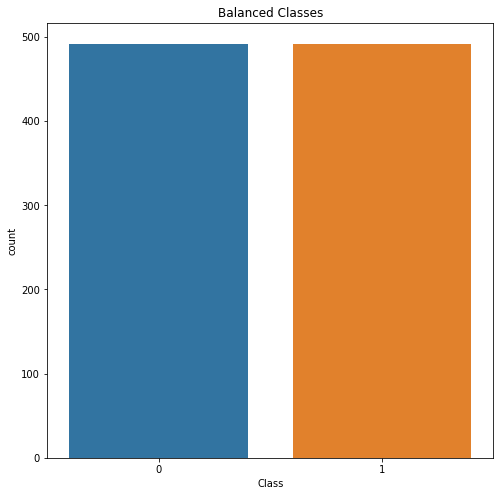

In [4]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

#this code snippet is based on the code from this article -> https://towardsdatascience.com/having-an-imbalanced-dataset-here-is-how-you-can-solve-it-1640568947eb 
ds = dataset.to_pandas_dataframe()
shuffled_df = ds.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
fraud_df = shuffled_df.loc[shuffled_df['Class'] == 1]

#Randomly select 492 observations from the non-fraud (majority class)
non_fraud_df = shuffled_df.loc[shuffled_df['Class'] == 0].sample(n=492,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([fraud_df, non_fraud_df])

#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('Class', data=normalized_df)
plt.title('Balanced Classes')

In [5]:
# the code is based on the official Microsoft documentation, which can be found 
# here -> https://docs.microsoft.com/en-us/azure/machine-learning/how-to-create-register-datasets#create-a-dataset-from-pandas-dataframe 

local_path = './prepared.csv'
normalized_df.to_csv(local_path)

# get the datastore to upload prepared data
datastore = workspace.get_default_datastore()

# upload the local file from src_dir to the target_path in datastore
datastore.upload(src_dir='./', target_path='./')

# create a dataset referencing the cloud location
dataset = Dataset.Tabular.from_delimited_files(path = [(datastore, ('./prepared.csv'))])

Uploading an estimated of 17 files
Uploading ./.amlignore
Uploaded ./.amlignore, 1 files out of an estimated total of 17
Uploading ./.amlignore.amltmp
Uploaded ./.amlignore.amltmp, 2 files out of an estimated total of 17
Uploading ./automl.log
Uploaded ./automl.log, 3 files out of an estimated total of 17
Uploading ./automl_v2.ipynb
Uploaded ./automl_v2.ipynb, 4 files out of an estimated total of 17
Uploading ./azureml_automl.log
Uploaded ./azureml_automl.log, 5 files out of an estimated total of 17
Uploading ./endpoint.py
Uploaded ./endpoint.py, 6 files out of an estimated total of 17
Uploading ./hyperparameter_tuning.ipynb
Uploaded ./hyperparameter_tuning.ipynb, 7 files out of an estimated total of 17
Uploading ./hyperparameter_tuning.ipynb.amltmp
Uploaded ./hyperparameter_tuning.ipynb.amltmp, 8 files out of an estimated total of 17
Uploading ./score.py
Uploaded ./score.py, 9 files out of an estimated total of 17
Uploading ./score.py.amltmp
Uploaded ./score.py.amltmp, 10 files out of

In [7]:
from azureml.core import Experiment

# choose a name for experiment
experiment_name = 'lab3-experiment'

exp = Experiment(workspace=workspace, name=experiment_name)
exp

Name,Workspace,Report Page,Docs Page
lab3-experiment,quick-starts-ws-140301,Link to Azure Machine Learning studio,Link to Documentation


## Hyperdrive Configuration

TODO: Explain the model you are using and the reason for chosing the different hyperparameters, termination policy and config settings.

In [8]:
from azureml.core.compute import ComputeTarget, AmlCompute

# the code sninppet is based on official Microsoft documentation, which can be found
# here -> https://docs.microsoft.com/en-us/azure/machine-learning/how-to-create-attach-compute-cluster?tabs=python
from azureml.core.compute_target import ComputeTargetException

# A name for the cluster
cpu_cluster_name = "lab3-cluster"

# Verification that cluster does not exist yet
try:
    cpu_cluster = ComputeTarget(workspace=workspace, name=cpu_cluster_name)
    print('The cluster already exists')
except ComputeTargetException:
    compute_config = AmlCompute.provisioning_configuration(vm_size='STANDARD_D2_V2', max_nodes=4)
    cpu_cluster = ComputeTarget.create(workspace, cpu_cluster_name, compute_config)

cpu_cluster.wait_for_completion(show_output=True)

The cluster already exists
Succeeded
AmlCompute wait for completion finished

Minimum number of nodes requested have been provisioned


In [9]:
from azureml.widgets import RunDetails
from azureml.train.sklearn import SKLearn
from azureml.train.hyperdrive.run import PrimaryMetricGoal
from azureml.train.hyperdrive.policy import BanditPolicy
from azureml.train.hyperdrive.sampling import RandomParameterSampling
from azureml.train.hyperdrive.runconfig import HyperDriveConfig
from azureml.train.hyperdrive.parameter_expressions import choice
import os

# TODO: Create an early termination policy. This is not required if you are using Bayesian sampling.
early_termination_policy = BanditPolicy(evaluation_interval=50, slack_factor=None, slack_amount=0.2, delay_evaluation=0)

#TODO: Create the different params that you will be using during training
param_sampling = RandomParameterSampling(
    {
        "--C": choice(0.001, 0.01, 0.1, 1.0),
        "--max_iter": choice(30, 50, 100, 250)
    }
)

#TODO: Create your estimator and hyperdrive config
estimator = SKLearn(source_directory = "./", compute_target=cpu_cluster, entry_script="train.py", script_params=None)

hyperdrive_run_config = HyperDriveConfig(hyperparameter_sampling=param_sampling, primary_metric_name="Accuracy", 
                                    primary_metric_goal=PrimaryMetricGoal.MAXIMIZE, max_total_runs=20, 
                                    max_concurrent_runs=4, policy=early_termination_policy, estimator=estimator)

'SKLearn' estimator is deprecated. Please use 'ScriptRunConfig' from 'azureml.core.script_run_config' with your own defined environment or the AzureML-Tutorial curated environment.


In [10]:
#TODO: Submit your experiment
hyper_submit = exp.submit(hyperdrive_run_config)

## Run Details

OPTIONAL: Write about the different models trained and their performance. Why do you think some models did better than others?

TODO: In the cell below, use the `RunDetails` widget to show the different experiments.

In [11]:
from azureml.widgets import RunDetails
RunDetails(hyper_submit).show()

_HyperDriveWidget(widget_settings={'childWidgetDisplay': 'popup', 'send_telemetry': False, 'log_level': 'INFO'…

## Best Model

TODO: In the cell below, get the best model from the hyperdrive experiments and display all the properties of the model.

In [12]:
# the code is based on the official Microsoft documentation, which can be found
# here -> https://docs.microsoft.com/en-us/azure/machine-learning/how-to-tune-hyperparameters#find-the-best-model 
best_run = hyper_submit.get_best_run_by_primary_metric()
best_run_metrics = best_run.get_metrics()

print('Best Run Id: ', best_run.id)
print('\n Accuracy:', best_run_metrics['Accuracy'])

Best Run Id:  HD_a6a56180-7a64-48e5-94a2-37e496925a5c_9

 Accuracy: 0.9446153846153846


In [30]:
#TODO: Save the best model
best_model = best_run.register_model(model_name="best_model", model_path="./")
print(best_run)

Run(Experiment: lab3-experiment,
Id: HD_a6a56180-7a64-48e5-94a2-37e496925a5c_9,
Type: azureml.scriptrun,
Status: Completed)


In [31]:
print(best_model)

Model(workspace=Workspace.create(name='quick-starts-ws-140301', subscription_id='3d1a56d2-7c81-4118-9790-f85d1acf0c77', resource_group='aml-quickstarts-140301'), name=best_model, id=best_model:2, version=2, tags={}, properties={})


## Model Deployment

Remember you have to deploy only one of the two models you trained.. Perform the steps in the rest of this notebook only if you wish to deploy this model.

TODO: In the cell below, register the model, create an inference config and deploy the model as a web service.

In [32]:
%run score.py

In [18]:
pip install inference-schema

  Created wheel for wrapt: filename=wrapt-1.11.1-cp36-cp36m-linux_x86_64.whl size=66566 sha256=2401f3a68cefcace56789fec8b208f5466903aaf1258766f12e7e2989bba9a28
  Stored in directory: /home/azureuser/.cache/pip/wheels/94/0f/ec/66085641573800014bb0c8b657f3366eff641c42df79abbfe9
Successfully built wrapt
ERROR: tensorflow 2.1.0 has requirement scipy==1.4.1; python_version >= "3", but you'll have scipy 1.5.2 which is incompatible.
ERROR: tensorflow-gpu 2.1.0 has requirement scipy==1.4.1; python_version >= "3", but you'll have scipy 1.5.2 which is incompatible.
ERROR: autokeras 1.0.12 has requirement tensorflow>=2.3.0, but you'll have tensorflow 2.1.0 which is incompatible.
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.12.1
    Uninstalling wrapt-1.12.1:
      Successfully uninstalled wrapt-1.12.1
Note: you may need to restart the kernel to use updated packages.


In [33]:
print(best_model.name, best_model.id, best_model.version, sep='\t')

best_model	best_model:2	2


In [34]:
print(best_model)

Model(workspace=Workspace.create(name='quick-starts-ws-140301', subscription_id='3d1a56d2-7c81-4118-9790-f85d1acf0c77', resource_group='aml-quickstarts-140301'), name=best_model, id=best_model:2, version=2, tags={}, properties={})


In [57]:
#TODO: Save the best model

import joblib
joblib.dump(best_model, 'best_model.pkl')

TypeError: can't pickle _thread.RLock objects

In [59]:
from azureml.core.environment import Environment
from azureml.core.model import InferenceConfig
from azureml.core.webservice import AciWebservice, Webservice
from azureml.core.model import Model

env = best_run.get_environment()
for pip_package in ["scikit-learn"]:
    env.python.conda_dependencies.add_pip_package(pip_package)

inference_config = InferenceConfig(entry_script='score.py', environment=env)

service_name = 'payment-fraud-detection'

aci_config = AciWebservice.deploy_configuration(cpu_cores=1, memory_gb=1)

service = Model.deploy(workspace=workspace, name=service_name, models=[best_model], inference_config=inference_config, 
                       deployment_config=aci_config, overwrite=True)
service.wait_for_deployment(show_output=True)

print(service.state)

Tips: You can try get_logs(): https://aka.ms/debugimage#dockerlog or local deployment: https://aka.ms/debugimage#debug-locally to debug if deployment takes longer than 10 minutes.
Running................................................
Failed


ERROR:azureml.core.webservice.webservice:Service deployment polling reached non-successful terminal state, current service state: Failed
Operation ID: d252eb0d-3ee9-45ab-a0c5-ffe510afecd6
More information can be found using '.get_logs()'
Error:
{
  "code": "AciDeploymentFailed",
  "statusCode": 400,
  "message": "Aci Deployment failed with exception: Your container application crashed. This may be caused by errors in your scoring file's init() function.
	1. Please check the logs for your container instance: payment-fraud-detection. From the AML SDK, you can run print(service.get_logs()) if you have service object to fetch the logs.
	2. You can interactively debug your scoring file locally. Please refer to https://docs.microsoft.com/azure/machine-learning/how-to-debug-visual-studio-code#debug-and-troubleshoot-deployments for more information.
	3. You can also try to run image viennaprivate.azurecr.io/sklearn:0.20.3-cpu locally. Please refer to https://aka.ms/debugimage#service-launch-fa

WebserviceException: WebserviceException:
	Message: Service deployment polling reached non-successful terminal state, current service state: Failed
Operation ID: d252eb0d-3ee9-45ab-a0c5-ffe510afecd6
More information can be found using '.get_logs()'
Error:
{
  "code": "AciDeploymentFailed",
  "statusCode": 400,
  "message": "Aci Deployment failed with exception: Your container application crashed. This may be caused by errors in your scoring file's init() function.
	1. Please check the logs for your container instance: payment-fraud-detection. From the AML SDK, you can run print(service.get_logs()) if you have service object to fetch the logs.
	2. You can interactively debug your scoring file locally. Please refer to https://docs.microsoft.com/azure/machine-learning/how-to-debug-visual-studio-code#debug-and-troubleshoot-deployments for more information.
	3. You can also try to run image viennaprivate.azurecr.io/sklearn:0.20.3-cpu locally. Please refer to https://aka.ms/debugimage#service-launch-fails for more information.",
  "details": [
    {
      "code": "CrashLoopBackOff",
      "message": "Your container application crashed. This may be caused by errors in your scoring file's init() function.
	1. Please check the logs for your container instance: payment-fraud-detection. From the AML SDK, you can run print(service.get_logs()) if you have service object to fetch the logs.
	2. You can interactively debug your scoring file locally. Please refer to https://docs.microsoft.com/azure/machine-learning/how-to-debug-visual-studio-code#debug-and-troubleshoot-deployments for more information.
	3. You can also try to run image viennaprivate.azurecr.io/sklearn:0.20.3-cpu locally. Please refer to https://aka.ms/debugimage#service-launch-fails for more information."
    },
    {
      "code": "AciDeploymentFailed",
      "message": "Your container application crashed. Please follow the steps to debug:
	1. From the AML SDK, you can run print(service.get_logs()) if you have service object to fetch the logs. Please refer to https://aka.ms/debugimage#dockerlog for more information.
	2. If your container application crashed. This may be caused by errors in your scoring file's init() function. You can try debugging locally first. Please refer to https://aka.ms/debugimage#debug-locally for more information.
	3. You can also interactively debug your scoring file locally. Please refer to https://docs.microsoft.com/azure/machine-learning/how-to-debug-visual-studio-code#debug-and-troubleshoot-deployments for more information.
	4. View the diagnostic events to check status of container, it may help you to debug the issue.
"RestartCount": 3
"CurrentState": {"state":"Waiting","startTime":null,"exitCode":null,"finishTime":null,"detailStatus":"CrashLoopBackOff: Back-off restarting failed"}
"PreviousState": {"state":"Terminated","startTime":"2021-03-13T00:18:53.865Z","exitCode":111,"finishTime":"2021-03-13T00:18:58.37Z","detailStatus":"Error"}
"Events":
{"count":1,"firstTimestamp":"2021-03-13T00:15:58Z","lastTimestamp":"2021-03-13T00:15:58Z","name":"Pulling","message":"pulling image "viennaprivate.azurecr.io/sklearn@sha256:0872f0c6f84de53fd9a64652f545a186d80148fba1410929361acdb9408b0a2e"","type":"Normal"}
{"count":1,"firstTimestamp":"2021-03-13T00:17:06Z","lastTimestamp":"2021-03-13T00:17:06Z","name":"Pulled","message":"Successfully pulled image "viennaprivate.azurecr.io/sklearn@sha256:0872f0c6f84de53fd9a64652f545a186d80148fba1410929361acdb9408b0a2e"","type":"Normal"}
{"count":4,"firstTimestamp":"2021-03-13T00:17:24Z","lastTimestamp":"2021-03-13T00:18:53Z","name":"Started","message":"Started container","type":"Normal"}
{"count":4,"firstTimestamp":"2021-03-13T00:17:34Z","lastTimestamp":"2021-03-13T00:18:58Z","name":"Killing","message":"Killing container with id a1144c6802122f8621dfe85bceef32708b982f9f47325b7abacda9dcee94c2a6.","type":"Normal"}
"
    }
  ]
}
	InnerException None
	ErrorResponse 
{
    "error": {
        "message": "Service deployment polling reached non-successful terminal state, current service state: Failed\nOperation ID: d252eb0d-3ee9-45ab-a0c5-ffe510afecd6\nMore information can be found using '.get_logs()'\nError:\n{\n  \"code\": \"AciDeploymentFailed\",\n  \"statusCode\": 400,\n  \"message\": \"Aci Deployment failed with exception: Your container application crashed. This may be caused by errors in your scoring file's init() function.\n\t1. Please check the logs for your container instance: payment-fraud-detection. From the AML SDK, you can run print(service.get_logs()) if you have service object to fetch the logs.\n\t2. You can interactively debug your scoring file locally. Please refer to https://docs.microsoft.com/azure/machine-learning/how-to-debug-visual-studio-code#debug-and-troubleshoot-deployments for more information.\n\t3. You can also try to run image viennaprivate.azurecr.io/sklearn:0.20.3-cpu locally. Please refer to https://aka.ms/debugimage#service-launch-fails for more information.\",\n  \"details\": [\n    {\n      \"code\": \"CrashLoopBackOff\",\n      \"message\": \"Your container application crashed. This may be caused by errors in your scoring file's init() function.\n\t1. Please check the logs for your container instance: payment-fraud-detection. From the AML SDK, you can run print(service.get_logs()) if you have service object to fetch the logs.\n\t2. You can interactively debug your scoring file locally. Please refer to https://docs.microsoft.com/azure/machine-learning/how-to-debug-visual-studio-code#debug-and-troubleshoot-deployments for more information.\n\t3. You can also try to run image viennaprivate.azurecr.io/sklearn:0.20.3-cpu locally. Please refer to https://aka.ms/debugimage#service-launch-fails for more information.\"\n    },\n    {\n      \"code\": \"AciDeploymentFailed\",\n      \"message\": \"Your container application crashed. Please follow the steps to debug:\n\t1. From the AML SDK, you can run print(service.get_logs()) if you have service object to fetch the logs. Please refer to https://aka.ms/debugimage#dockerlog for more information.\n\t2. If your container application crashed. This may be caused by errors in your scoring file's init() function. You can try debugging locally first. Please refer to https://aka.ms/debugimage#debug-locally for more information.\n\t3. You can also interactively debug your scoring file locally. Please refer to https://docs.microsoft.com/azure/machine-learning/how-to-debug-visual-studio-code#debug-and-troubleshoot-deployments for more information.\n\t4. View the diagnostic events to check status of container, it may help you to debug the issue.\n\"RestartCount\": 3\n\"CurrentState\": {\"state\":\"Waiting\",\"startTime\":null,\"exitCode\":null,\"finishTime\":null,\"detailStatus\":\"CrashLoopBackOff: Back-off restarting failed\"}\n\"PreviousState\": {\"state\":\"Terminated\",\"startTime\":\"2021-03-13T00:18:53.865Z\",\"exitCode\":111,\"finishTime\":\"2021-03-13T00:18:58.37Z\",\"detailStatus\":\"Error\"}\n\"Events\":\n{\"count\":1,\"firstTimestamp\":\"2021-03-13T00:15:58Z\",\"lastTimestamp\":\"2021-03-13T00:15:58Z\",\"name\":\"Pulling\",\"message\":\"pulling image \"viennaprivate.azurecr.io/sklearn@sha256:0872f0c6f84de53fd9a64652f545a186d80148fba1410929361acdb9408b0a2e\"\",\"type\":\"Normal\"}\n{\"count\":1,\"firstTimestamp\":\"2021-03-13T00:17:06Z\",\"lastTimestamp\":\"2021-03-13T00:17:06Z\",\"name\":\"Pulled\",\"message\":\"Successfully pulled image \"viennaprivate.azurecr.io/sklearn@sha256:0872f0c6f84de53fd9a64652f545a186d80148fba1410929361acdb9408b0a2e\"\",\"type\":\"Normal\"}\n{\"count\":4,\"firstTimestamp\":\"2021-03-13T00:17:24Z\",\"lastTimestamp\":\"2021-03-13T00:18:53Z\",\"name\":\"Started\",\"message\":\"Started container\",\"type\":\"Normal\"}\n{\"count\":4,\"firstTimestamp\":\"2021-03-13T00:17:34Z\",\"lastTimestamp\":\"2021-03-13T00:18:58Z\",\"name\":\"Killing\",\"message\":\"Killing container with id a1144c6802122f8621dfe85bceef32708b982f9f47325b7abacda9dcee94c2a6.\",\"type\":\"Normal\"}\n\"\n    }\n  ]\n}"
    }
}

TODO: In the cell below, send a request to the web service you deployed to test it.

TODO: In the cell below, print the logs of the web service and delete the service